# Lesson 02: Warm-up & Last Class Refresher

Recall that last week's objectives were:

* Describe fundamental aspects of a working Python script
* Implement novel functions and for loops along with appropriate unit tests
* Utilize 'external' python packages

This warm-up aims to build on those objectives and reinforce them.


## 1. Basics of functions

### 1(a): ins and outs

Run the following cell.  It doesn't work as expected.  Explain why (in a markdown cell below it) and create a new cell below that with a fixed version of the code.

In [1]:
def factorial(n):
    """Calculates the factorial of a number."""
    fac = 1
    if n == 1:
        fac = 1
    else:
        fac = n * factorial(n-1)
        

# test the factorial function; this should print 120
print(factorial(5))

TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

It does not work as expected because the function appears to be designed to return a value.  It has no `return` statement, however.  The default return value for a function in Python is `None`, so the error arises because line 7 tries to multiply the number by the value `None`, which is not supported.  The fix is to add a return statement.

In [2]:
# put correct code for 1a here
def factorial(n):
    """Calculates the factorial of a number."""
    fac = 1
    if n == 1:
        fac = 1
    else:
        fac = n * factorial(n-1)
    return fac
        

# test the factorial function; this should print 120
print(factorial(5))

120


### 1(b): Writing new functions

Write a function representing the formula $z = x^2 + y^2$ and verify that it works as expected.

In [3]:
# put code for 1b here
def z_func(x, y):
    return x**2 + y**2

# create some test data
xtest, ytest, ztest = [1, 2, 3], [4, 5, 6], [17, 29, 45]

# test the z_func function using the `assert` statement
for x, y, z in zip(xtest, ytest, ztest):
    assert z_func(x, y) == z, "Incorrect result for x={}, y={}".format(x, y)

# if we get here, all tests passed
print("All tests passed!")

All tests passed!


### 1(c): Scope

We haven't yet discussed the concept of *scope*, so we'll introduce it here through examining an interesting effect (and we'll discuss it more as time goes on.)

Run the cell below.  We see that the value of `a` is redefined when `redefine_and_print_a()` is called, so why does the last print statement contain the original definition of `a` and not the one it was given within the function?


In [4]:
# define a as a global variable here
a = "This is `a` with global scope."
# print a to show its value
print(f"1: {a}")

# define a function
def redefine_and_print_a():
    # define a as a local variable here
    a = "This is `a` with local scope."
    # print a to show its value
    print(f"2: {a}")

# call the function
redefine_and_print_a()

# print a one more time to show its value
print(f"3: {a}")



1: This is `a` with global scope.
2: This is `a` with local scope.
3: This is `a` with global scope.


In its first definition, `a` has global scope.  Within the function, it takes on a new value; it's essentially an entirely new variable (despite having the same name) that exists only as long as the function is executing.  After the function is complete, the *local* version of a disappears...and regardless, the global version of `a` was never touched.  So it retains its original value.

## 2. Using external packages

Make a plot of the following equation  using `numpy` and `matplotlib`.  Use `x` values ranging from -8 to 8, and make plots using the following values of $\sigma$: $\sigma = [0.25,0.5,1,2,4]$

$$\mathcal{N}(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{x^2}{2 \sigma^2}}$$

Your solution should (a) define a new function to represent this formula, and (b) use a `for` loop.

If you have time, customize the x- and y-axis labels, and add a legend.

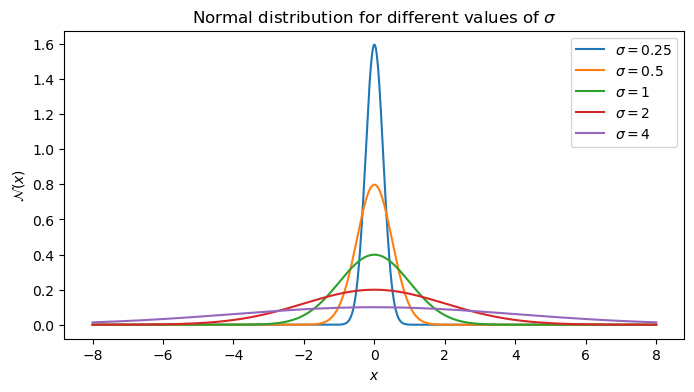

In [5]:
# put your code for 2 here
import numpy as np
import matplotlib.pyplot as plt

def norm(x, sigma):
    """Returns the value of a Gaussian with mean 0 and standard deviation sigma."""
    return np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

# set the values of sigma to plot
sigma_values = [0.25, 0.5, 1, 2, 4]
# set the values of x
x = np.linspace(-8,8,1000)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# loop over the values of sigma
for sigma in sigma_values:
    # plot the Gaussian
    ax.plot(x, norm(x, sigma), label=r"$\sigma = {}$".format(sigma))

# set the x and y labels
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\mathcal{N}(x)$")

# add a title
ax.set_title("Normal distribution for different values of $\sigma$")

# set the legend
ax.legend()

plt.show()
